In [1]:
# Simulation

g = 9.81                  
d_a = 1.2754                   
d_h = 1000  

def simulate(h_0=3000, h_p=500, v_0=100, m=70, k_p=56, k_h=10, dt=0.1):
    T = []
    X = []
    Y = []
    Vx = []
    Vy = []
    Ax = []
    Ay = []

    t = 0
    x = 0
    y = h_0
    v_x = v_0
    v_y = 0

    while (y > 0):
        t += dt
        T.append(t)

        a_x = -k_h * v_x / m
        if y > h_p:
            a_y = g * (d_a / d_h - 1) - k_h * v_y / m
        else:
            a_y = g * (d_a / d_h - 1) - k_p * v_y / m
        Ax.append(a_x)
        Ay.append(a_y)

        x += v_x * dt + a_x * dt * dt / 2
        y += v_y * dt + a_y * dt * dt / 2
        X.append(x)
        Y.append(y)

        v_x += a_x * dt
        v_y += a_y * dt
        Vx.append(v_x)
        Vy.append(v_y)

    return [T, X, Y, Vx, Vy, Ax, Ay]


T, X, Y, Vx, Vy, Ax, Ay = simulate()


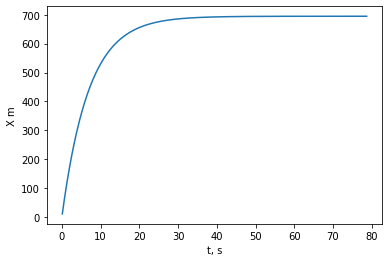

In [2]:
# Plot X(t)

import matplotlib.pyplot as plt

plt.xlabel("t, s")
plt.ylabel("X m")
plt.plot(T, X)

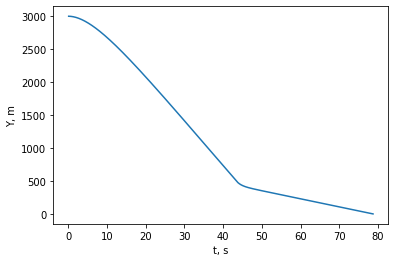

In [3]:
# Plot Y(t)

import matplotlib.pyplot as plt

plt.xlabel("t, s")
plt.ylabel("Y, m")
plt.plot(T, Y)

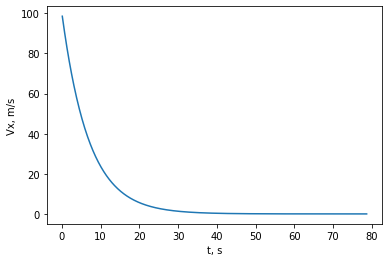

In [4]:
# Plot Vx(t)

import matplotlib.pyplot as plt

plt.xlabel("t, s")
plt.ylabel("Vx, m/s")
plt.plot(T, Vx)

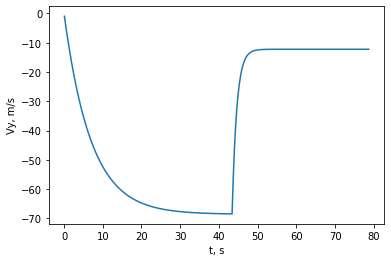

In [5]:
# Plot Vy(t)

import matplotlib.pyplot as plt

plt.xlabel("t, s")
plt.ylabel("Vy, m/s")
plt.plot(T, Vy)

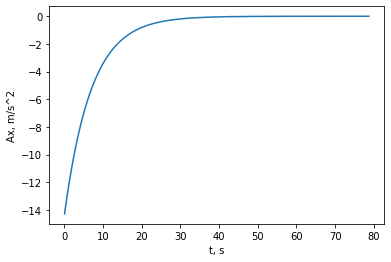

In [6]:
# Plot Ax(t)

import matplotlib.pyplot as plt

plt.xlabel("t, s")
plt.ylabel("Ax, m/s^2")
plt.plot(T, Ax)

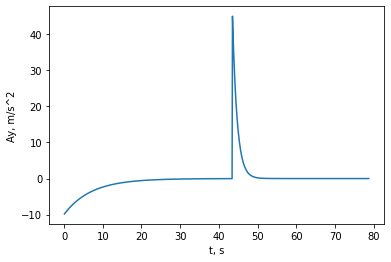

In [7]:
# Plot Ay(t)

import matplotlib.pyplot as plt

plt.xlabel("t, s")
plt.ylabel("Ay, m/s^2")
plt.plot(T, Ay)

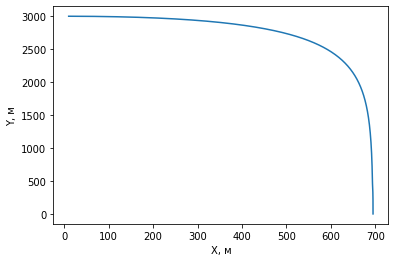

In [8]:
# Plot X(Y)

import matplotlib.pyplot as plt

plt.xlabel("X, м")
plt.ylabel("Y, м")
plt.plot(X, Y)

In [9]:
# Finding the optimal parachute opening time

import math

v_s = 15
left = 0
right = 1e9

for i in range(1, 250):
    middle = (left + right) / 2
    T, X, Y, Vx, Vy, Ax, Ay = simulate(h_p=middle)
    if (math.sqrt(Vx[-1] ** 2 + Vy[-1] ** 2) <= v_s):
        right = middle
    else:
        left = middle

print(right)

108.84372336845983
